In [65]:
import dump
dw = dump.Wrapper(csvpath='prozhito-dump-1.40-11.04.2019')

from natasha import (
    Segmenter,
    MorphVocab,
    
    NewsEmbedding,
    NewsMorphTagger,
    NewsSyntaxParser,
    NewsNERTagger,
    
    PER,
    NamesExtractor,

    Doc
)
segmenter = Segmenter()
morph_vocab = MorphVocab()

emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)
syntax_parser = NewsSyntaxParser(emb)
ner_tagger = NewsNERTagger(emb)

from collections import Counter

import matplotlib.pyplot as plt

Я выбрал дневники за 31 июля 1914 -- в этот день Николай II объявил в России всеобщую мобилизацию в связи с начинающейся войной. Я подумал, что в дневниках за этот день должны быть обсуждения геополитики, названия стран, имена людей и т.д. Кроме того, эта дата отстоит сравнительно далеко от нас, и язык в чем-то успел за это время поменяться. Записей оказалось 16, в них около 4300 слов.

In [78]:
notes_sample = dw.notes[(1914, 7, 31) : (1914, 7, 31)]
notes_sample

[ #31791 "Мобилизация всех зап...." @84 [1914-7-31] ,
  #49820 "Ничего не *причувствуя*..." @283 [1914-7-31] ,
  #68451 "Ночью много просыпался,..." @179 [1914-7-31] ,
  ... ,
  #414371 "Вчера в одиннадцать..." @959 [1914-7-31] ]

In [79]:
len(notes_sample)

16

In [80]:
texts = []
for i in notes_sample:
    texts.append(i.text)
len('\n'.join(texts).split())

4333

В качестве NER-решения я взял библиотеку natasha с NER-тэггером, обученном на новостном корпусе. Он должен находить в тексте дневников упоминания мест, имен людей и организаций. Пока нет разметки, численно оценить качество его работы сложно. Из-за специфичности задачи не совсем очевидно, как именно считать качество модели. По-разному можно относиться к случаям, когда модель размечает участок, который не следовало размечать, или, наоборот, пропускает участок, который есть в разметке. Тем не менее, мне кажется, подошла бы некоторая модификация accuracy, а также cross entropy loss.

In [57]:
spans = []
for text in texts:
    doc = Doc(text)
    doc.segment(segmenter)
    doc.tag_morph(morph_tagger)
    doc.parse_syntax(syntax_parser)
    doc.tag_ner(ner_tagger)
    doc.ner.print()
    spans.extend(doc.spans)

Мобилизация всех зап. ниж. чинов и офицеров.
Ничего не *причувствуя* и не предвидя, что могло случиться в этот 
день, живя на нем, я только и знал одно: как бы убрать свое заветное 
дело, свести все с него и жить дома, зная одно домашнее 
обстоятельство. День клонился к вечеру, я должен по уборке дневного 
дела ехать домой, как вдруг приезжает нарочный и передает, что 
объявлена всеобщая мобилизация и каждый должен явиться на *нозначеный*
 сборный пункт. Узнав все от нарочного, я сейчас же, оставив все свои 
дела, поехал домой. Чрез несколько времени я уже был на сборном 
пункте. Раньше я был назначен в 34-й запасный полк, но по приезде на 
Фролов меня перевели в 19-ю отдельную сотню, где я до настоящего 
PER───                                                           
времени.
Ночью много просыпался, боясь проспать, а встав утром, пошёл на 
городскую станцию за билетом. Отложили отъезд ещё на два дня, и я 
достал билеты на воскресенье в Кисловодск. Заедем в Москву, чтобы 
           

С двенадцатым ударом, что отбили часы сегодня в полночь, — началась 
мобилизация. Для нас она не была неожиданностью; события последних 
дней, все нараставшие, естественно, приводили к необходимости быть 
готовыми к войне.    
Третьего дня уже знали о мобилизации пяти военных округов; вчерашней 
ночью была у нас ложная тревога. И потому весь день 17/VII в полку шла
 хлопотливая, по собственной инициативе начатая, подготовка к 
мобилизации, — пересчитывались и складывались кирасы, палаши и каски, 
проверялось содержимое цейхгаузов, выбрасывался всякий ненужный 
хлам... Вахмистры, каптенармусы и эскадронные писаря, между хлопотами,
 по много раз собирались на совещания, напрягая память, как бы не 
упустить чего-нибудь, что еще надо сделать. Офицеры делили свое время 
между казармами, конюшнями и собранием, куда забегали узнать о 
новостях и поделиться ими со своими товарищами.    
Около 10 часов вечера адъютант, к общему восторгу, сообщил, что 
наконец окончательно объявлена нам мобилиза

Пятница. Вчера в «Собрании узаконений», сегодня в газетах напечатан 
                  ORG────────────────                               
высочайший указ о приведении на военное положение части армии и 
флота... Это ответ Австрии на ее частичную мобилизацию, начатую 15 
                   LOC────                                         
июля.    
Манифестации на улицах местами имеют величественный характер. Все, 
кроме крайних левых, принимают в них то или иное участие. Царь-немец 
                                                          PER─────── 
боится войны и упорно стоит против нее, в особенности в военном 
совете. В. А. Сухомлинов пугает его возможностью эксцессов в армии и 
        PER─────────────                                             
уверяет, что Россия вполне готова. Он сам, по словам одного большого 
             LOC───                                                  
военного, высказал это в статье: «Россия хочет мира, но готова к 
                                

Вот некоторые вещи, которые, как кажется, влияют на ошибки модели при разметке старых дневников.

Natasha, как и, наверное, некоторые другие модели, обучена на корпусе современных новостей, из-за чего она хорошо распознает "вневременные" сущности (географические названия, расхожие имена), но гораздо хуже справляется со старыми именами и организациями, у которых не было шансов попасть в современные новости. Это, похоже, и отражает график ниже: тэгов LOC (географические названия) в разметке модели больше, чем PER (имена людей), и значительно больше, чем ORG (названия организаций).

Есть случаи омонимии, на которых ошибается модель и которые скорее неспецифичны для конкретной эпохи. Так, например, фамилию Шпионов модель распознала как географическое название, название деревни Пижмы -- как имя, а название корабля "Хабаровск" -- как город.

Специфика дневников в том, что в них могут попадаться ненормативные написания, которые не встречаются на новостных страницах и поэтому представляют трудности для модели. Это могут быть, например, сокращения или уменьшительные формы имен. Так, модель не распознала уменьшительную форму имени "Юрочка". Кроме того, natasha обучалась на новостных текстах с нормативной сменой регистра, поэтому обращает внимание на большие буквы в именах собственных. Имя собственное с маленькой буквы в дневнике поставит ее в тупик.

Возможно, некоторых подобных ошибок можно будет избежать, если дообучить модели на текстах соответствующей эпохи.

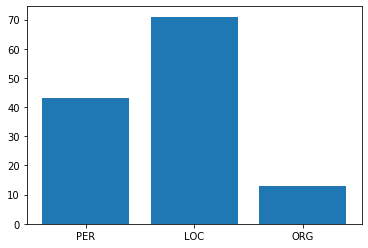

In [68]:
span_types = Counter([span.type for span in spans])
plt.bar(span_types.keys(), span_types.values());